# Kaggle -- Breast Tissue Classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')
BASE_PATH = "/content/drive/MyDrive/"

Mounted at /content/drive


In [2]:
!pip install missingno
!pip install pygam

     |████████████████████████████████| 1.8 MB 4.4 MB/s 


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
 
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import time
import os

import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

In [4]:
# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from pandas.api.types import CategoricalDtype 
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import cross_validate

# Model
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from pygam import LogisticGAM, s, f, l


# Evaluation 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

## Section 1: Data Loading and Pre-Processing

In [5]:
data = pd.read_csv(os.path.join(BASE_PATH, "data.csv"))
print("The shape of our dataset is: ", data.shape)
data.sample(10)

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
515,916221,B,11.340,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.02594,...,23.03,79.15,478.6,0.1483,0.1574,0.16240,0.08542,0.3060,0.06783,NaN
28,852973,M,15.300,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,...,36.71,149.30,1269.0,0.1641,0.6110,0.63350,0.20240,0.4027,0.09876,NaN
563,926125,M,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.10,1819.0,0.1407,0.4186,0.65990,0.25420,0.2929,0.09873,NaN
479,911916,M,16.250,19.51,109.80,815.8,0.10260,0.18930,0.22360,0.09194,...,23.05,122.10,939.7,0.1377,0.4462,0.58970,0.17750,0.3318,0.09136,NaN
554,924632,B,12.880,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,...,35.74,88.84,595.7,0.1227,0.1620,0.24390,0.06493,0.2372,0.07242,NaN
472,911384,B,14.920,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,...,18.22,112.00,906.6,0.1065,0.2791,0.31510,0.11470,0.2688,0.08273,NaN
65,859283,M,14.780,23.94,97.40,668.3,0.11720,0.14790,0.12670,0.09029,...,33.39,114.60,925.1,0.1648,0.3416,0.30240,0.16140,0.3321,0.08911,NaN
251,88518501,B,11.500,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,...,22.46,83.12,508.9,0.1183,0.1049,0.08105,0.06544,0.2740,0.06487,NaN
391,903483,B,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,...,22.80,64.01,317.0,0.1460,0.1310,0.00000,0.00000,0.2445,0.08865,NaN
93,862009,B,13.450,18.30,86.60,555.1,0.10220,0.08165,0.03974,0.02780,...,25.94,97.59,699.4,0.1339,0.1751,0.13810,0.07911,0.2678,0.06603,NaN


In [7]:
# drop id and unnamed 32
data = data.drop("id", axis = 1)
data = data.drop("Unnamed: 32", axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
numerical_columns = data.select_dtypes("float").columns.tolist()
numerical_columns
target_var = "diagnosis" 
print("The shape of the data after pre-processing: ", data.shape)
data.sample(5)

The shape of the data after pre-processing:  (569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
260,M,20.31,27.06,132.90,1288.0,0.10000,0.10880,0.15190,0.09333,0.1814,...,24.33,39.16,162.30,1844.0,0.15220,0.29450,0.37880,0.16970,0.3151,0.07999
67,B,11.31,19.04,71.80,394.1,0.08139,0.04701,0.03709,0.02230,0.1516,...,12.33,23.84,78.00,466.7,0.12900,0.09148,0.14440,0.06961,0.2400,0.06641
319,B,12.43,17.00,78.60,477.3,0.07557,0.03454,0.01342,0.01699,0.1472,...,12.90,20.21,81.76,515.9,0.08409,0.04712,0.02237,0.02832,0.1901,0.05932
187,B,11.71,17.19,74.68,420.3,0.09774,0.06141,0.03809,0.03239,0.1516,...,13.01,21.39,84.42,521.5,0.13230,0.10400,0.15210,0.10990,0.2572,0.07097
154,B,13.15,15.34,85.31,538.9,0.09384,0.08498,0.09293,0.03483,0.1822,...,14.77,20.50,97.67,677.3,0.14780,0.22560,0.30090,0.09722,0.3849,0.08633


## Section 2: EDA and Visualization

#### 1. Distribution and correlation of target variables

Text(0.5, 1.0, 'Distribution of target variable')

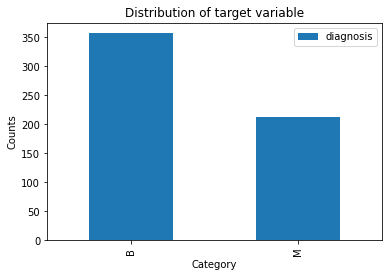

In [ ]:
fig, ax = plt.subplots()
data[target_var].value_counts().reset_index().plot.bar(x = "index", y = "diagnosis", ax = ax)
ax.set_xlabel("Category")
ax.set_ylabel("Counts")
ax.set_title("Distribution of target variable")

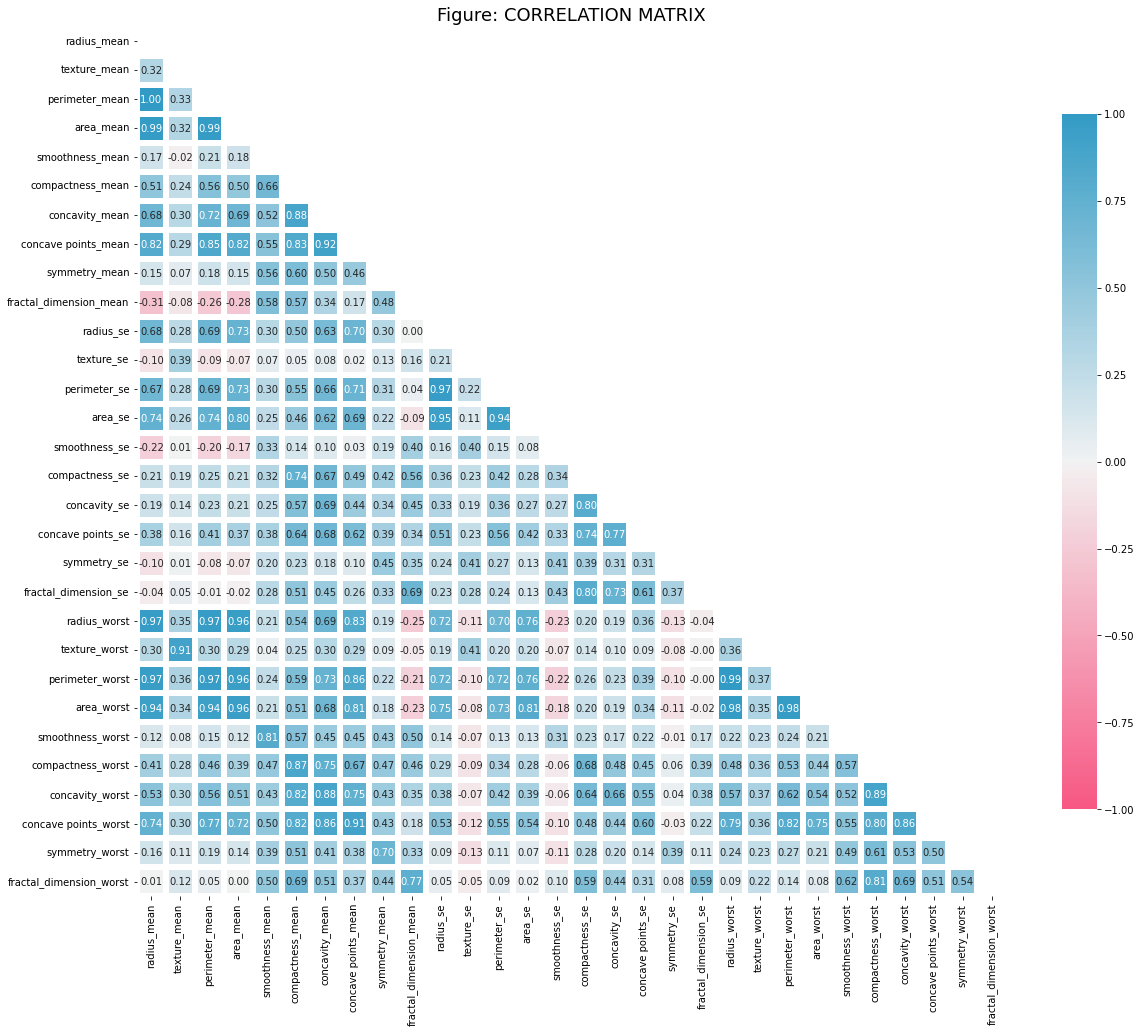

In [ ]:
### heatmap
fig, ax = plt.subplots(figsize=(20, 16))
# mask
mask = np.triu(np.ones_like(data[numerical_columns].corr(), dtype=np.bool))
# adjust mask and df
# mask = mask[1:, :-1]
corr = data[numerical_columns].corr().copy()
# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
# sns.heatmap(corr)
# # ticks
ax = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# # ticks
# yticks = [i.upper() for i in corr.index]
# xticks = [i.upper() for i in corr.columns]
# plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
# plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'Figure: CORRELATION MATRIX'
plt.title(title, loc='center', fontsize=18)
plt.savefig("heatmap.png")

plt.show()



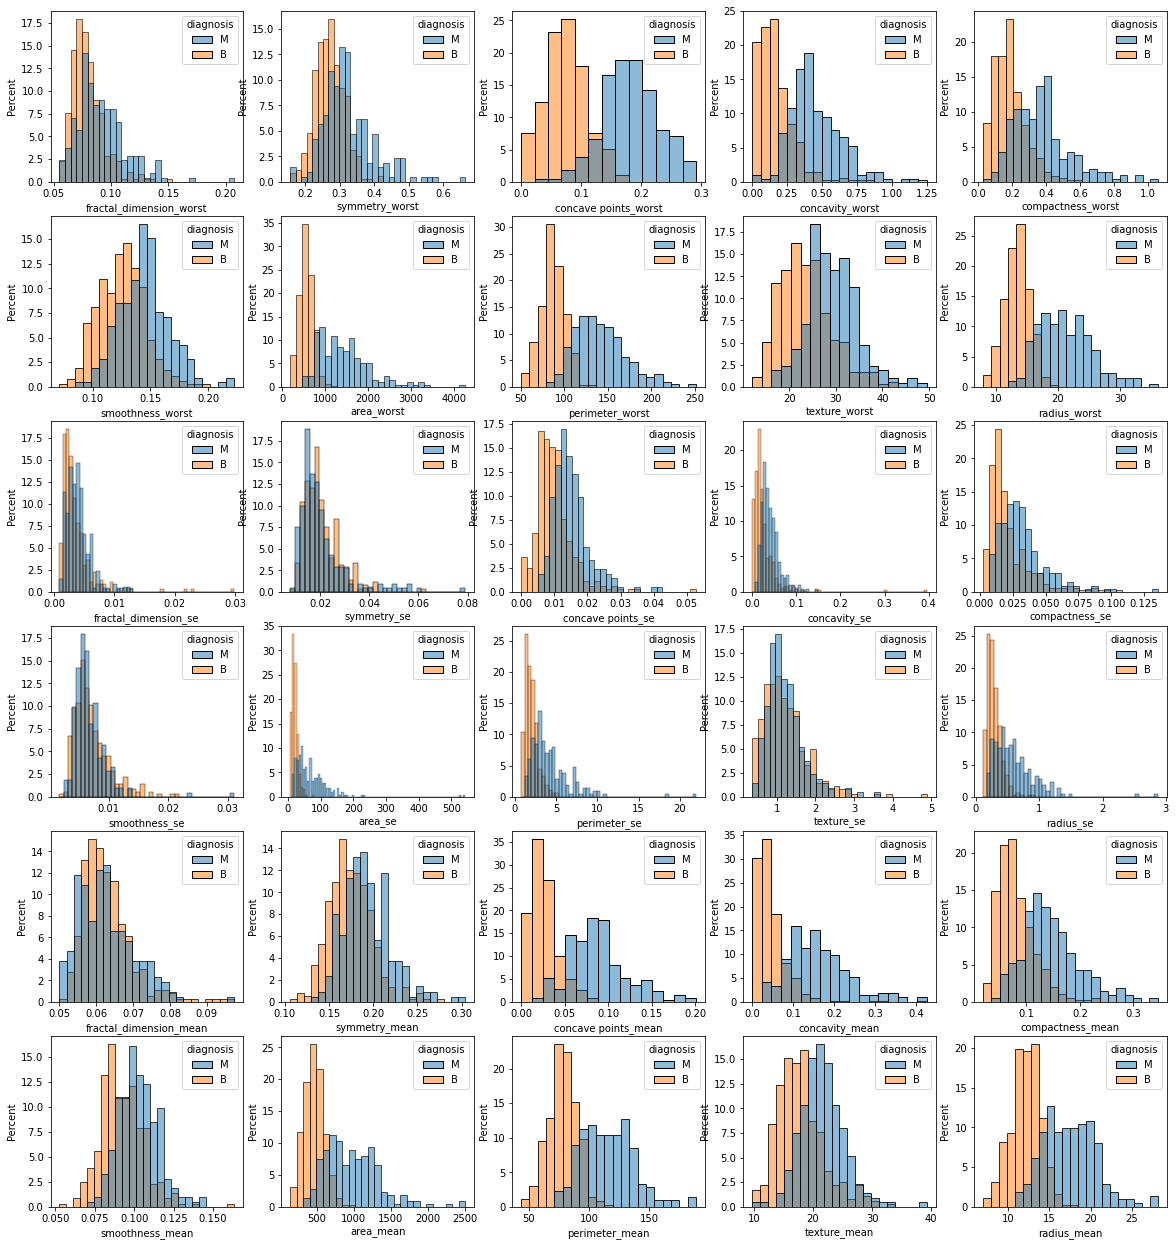

In [9]:
fig, axes = plt.subplots(6,5, figsize = (20, 22))
axes = list(axes.flatten())

for var in numerical_columns:
  ax = axes.pop()
  sns.histplot(data=data, x=var, stat='percent', hue=target_var, common_norm=False, ax = ax)
  
plt.savefig("distirbution.png")

## Section 3: PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
# get the features
x = data.drop(target_var, axis = 1)
# get the target
y = data[target_var]
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
# reduce the dimension to 2 for 2D visualization 
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# check the variance explained by the first two principle components
print("Percentage of variance explained by the Principle Component 1: ", pca.explained_variance_ratio_[0])
print("Percentage of variance explained by the Principle Component 2: ", pca.explained_variance_ratio_[1])
print("Percentage of variance explained by the first two PC: ", pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1])

Percentage of variance explained by the Principle Component 1:  0.4427202560752638
Percentage of variance explained by the Principle Component 2:  0.18971182044033086
Percentage of variance explained by the first two PC:  0.6324320765155946


In [ ]:
# create a dataframe for principle components
pca_df = pd.DataFrame(data = principalComponents, columns = ['pca_var1', 'pca_var2'])
pca_df["class"] = data["diagnosis"]
pca_df.head(5)

,pca_var1,pca_var2,class
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M


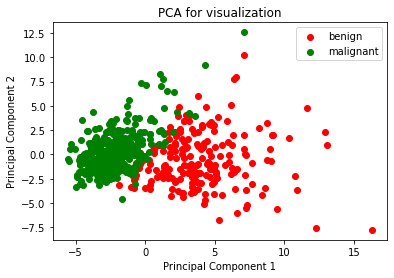

In [ ]:
# plot 
group = ["M", "B"]
color = ["r", "g"]
lab = ["benign", "malignant"]
for y, c, l in zip(group, color, lab):
    plt.scatter(pca_df[pca_df["class"]==y].pca_var1, pca_df[pca_df["class"]==y].pca_var2, color=c, label = l)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA for visualization")
plt.legend()
plt.show()

There is a visible boundary betweem benign and malignant tissue with only the first two priciple components. These two principle components could explain 63% of the total variance in the dataset.

## Section 4: Models

### Tain-Test Split

In [ ]:
data[target_var] = data[target_var].apply(lambda x: 1 if x == "M" else 0)
x = data.drop(target_var, axis = 1)
y = data[target_var]

X_train, X_test, y_train, y_test = train_test_split(x, y , train_size =0.8, random_state = 109, stratify = y)

In [ ]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
556,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.011160,0.1791,0.06331,...,10.65,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
382,12.050,22.72,78.75,447.8,0.06935,0.10730,0.079430,0.029780,0.1203,0.06659,...,12.57,28.71,87.36,488.4,0.08799,0.32140,0.29120,0.10920,0.2191,0.09349
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
332,11.220,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,11.98,25.78,76.91,436.1,0.14240,0.09669,0.01335,0.02022,0.3292,0.06522
149,13.740,17.91,88.12,585.0,0.07944,0.06376,0.028810,0.013290,0.1473,0.05580,...,15.34,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,20.580,22.14,134.70,1290.0,0.09090,0.13480,0.164000,0.095610,0.1765,0.05024,...,23.24,27.84,158.30,1656.0,0.11780,0.29200,0.38610,0.19200,0.2909,0.05865
348,11.470,16.03,73.02,402.7,0.09076,0.05886,0.025870,0.023220,0.1634,0.06372,...,12.51,20.79,79.67,475.8,0.15310,0.11200,0.09823,0.06548,0.2851,0.08763
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.066640,0.047810,0.1885,0.05766,...,15.11,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
26,14.580,21.53,97.41,644.8,0.10540,0.18680,0.142500,0.087830,0.2252,0.06924,...,17.62,33.21,122.40,896.9,0.15250,0.66430,0.55390,0.27010,0.4264,0.12750


In [ ]:
for var in X_train.columns.to_list():
  scaler = MinMaxScaler()
  X_train[var]=scaler.fit_transform(X_train[[var]])
  X_test[var] = scaler.transform(X_test[[var]])

### Ridge and LASSO

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
cv = StratifiedKFold(n_splits = 5, random_state = 263, shuffle= True)
parameters = {"penalty": ['l1', 'l2', 'elasticnet'], 
              'C':[1e-2, 1e-1, 1, 10, 1e2, 1e3],
              }

grid_lr = GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
                                 param_grid=parameters,
                                 cv=cv,
                                n_jobs = -1)
# lr = grid_lr.best_estimator_
grid_lr.fit(X_train, y_train) 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=263, shuffle=True),
             estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100.0, 1000.0],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [ ]:
lr = grid_lr.best_estimator_

lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

lr_train_predprob = lr.predict_proba(X_train)
lr_test_predprob = lr.predict_proba(X_test)

lr_train_acc= accuracy_score(y_train,lr_train_pred)
lr_test_acc= accuracy_score(y_test,lr_test_pred)

fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, lr_test_predprob[:, 1])

lr_train_f1= f1_score(y_train,lr_train_pred)
lr_test_f1= f1_score(y_test,lr_test_pred)

lr_train_auc = roc_auc_score(y_train, lr_train_predprob[:,1] )
lr_test_auc = roc_auc_score(y_test, lr_test_predprob[:,1] )

table_lr = pd.DataFrame([[lr_train_acc, lr_train_f1,lr_train_auc],[lr_test_acc, lr_test_f1, lr_test_auc]],
                         index = ["Train","Test"], columns = ["Accuracy","F1 Score","AUC"])
table_lr

,Accuracy,F1 Score,AUC
Train,0.969231,0.957317,0.992755
Test,0.973684,0.963855,0.996362


### GAM

First, let's try to use all features in a GAM model.

In [ ]:
model_gam = LogisticGAM()

model_gam.gridsearch(X_train.values, y_train.values)
print("train acc: %.4f" % model_gam.accuracy(X_train, y_train))
print("test acc: %.4f" % model_gam.accuracy(X_test, y_test))

  9% (1 of 11) |##                       | Elapsed Time: 0:01:26 ETA:   0:14:28

did not converge


 18% (2 of 11) |####                     | Elapsed Time: 0:02:10 ETA:   0:06:33

did not converge


 27% (3 of 11) |######                   | Elapsed Time: 0:02:51 ETA:   0:05:30

did not converge


 36% (4 of 11) |#########                | Elapsed Time: 0:03:33 ETA:   0:04:52

did not converge


 45% (5 of 11) |###########              | Elapsed Time: 0:04:17 ETA:   0:04:22

did not converge


 54% (6 of 11) |#############            | Elapsed Time: 0:04:59 ETA:   0:03:30

did not converge


 63% (7 of 11) |###############          | Elapsed Time: 0:05:43 ETA:   0:02:56

did not converge


 72% (8 of 11) |##################       | Elapsed Time: 0:06:25 ETA:   0:02:05

did not converge


 81% (9 of 11) |####################     | Elapsed Time: 0:07:08 ETA:   0:01:26

did not converge


100% (11 of 11) |########################| Elapsed Time: 0:07:15 Time:  0:07:15


train acc: 0.9824
test acc: 0.9737


In [ ]:
train_pred = model_gam.predict(X_train)
test_pred = model_gam.predict(X_test)

train_predprob = model_gam.predict_proba(X_train)
test_predprob = model_gam.predict_proba(X_test)

train_acc= accuracy_score(y_train,train_pred)
test_acc= accuracy_score(y_test,test_pred)

fpr, tpr, threshold = roc_curve(y_test, test_predprob)

train_f1= f1_score(y_train,train_pred)
test_f1= f1_score(y_test,test_pred)

train_auc = roc_auc_score(y_train, train_predprob )
test_auc = roc_auc_score(y_test, test_predprob )

table = pd.DataFrame([[train_acc, train_f1,train_auc],[test_acc, test_f1, test_auc]],
                        index = ["Train","Test"], columns = ["Accuracy","F1 Score","AUC"])

table

,Accuracy,F1 Score,AUC
Train,0.982418,0.976331,0.997255
Test,0.973684,0.963855,0.995701


In [ ]:
model_gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     22.1548
Link Function:                        LogitLink Log Likelihood:                                    -30.666
Number of Samples:                          455 AIC:                                              105.6417
                                                AICc:                                              108.238
                                                UBRE:                                               2.2711
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                    0.898
Feature Function                  Lam

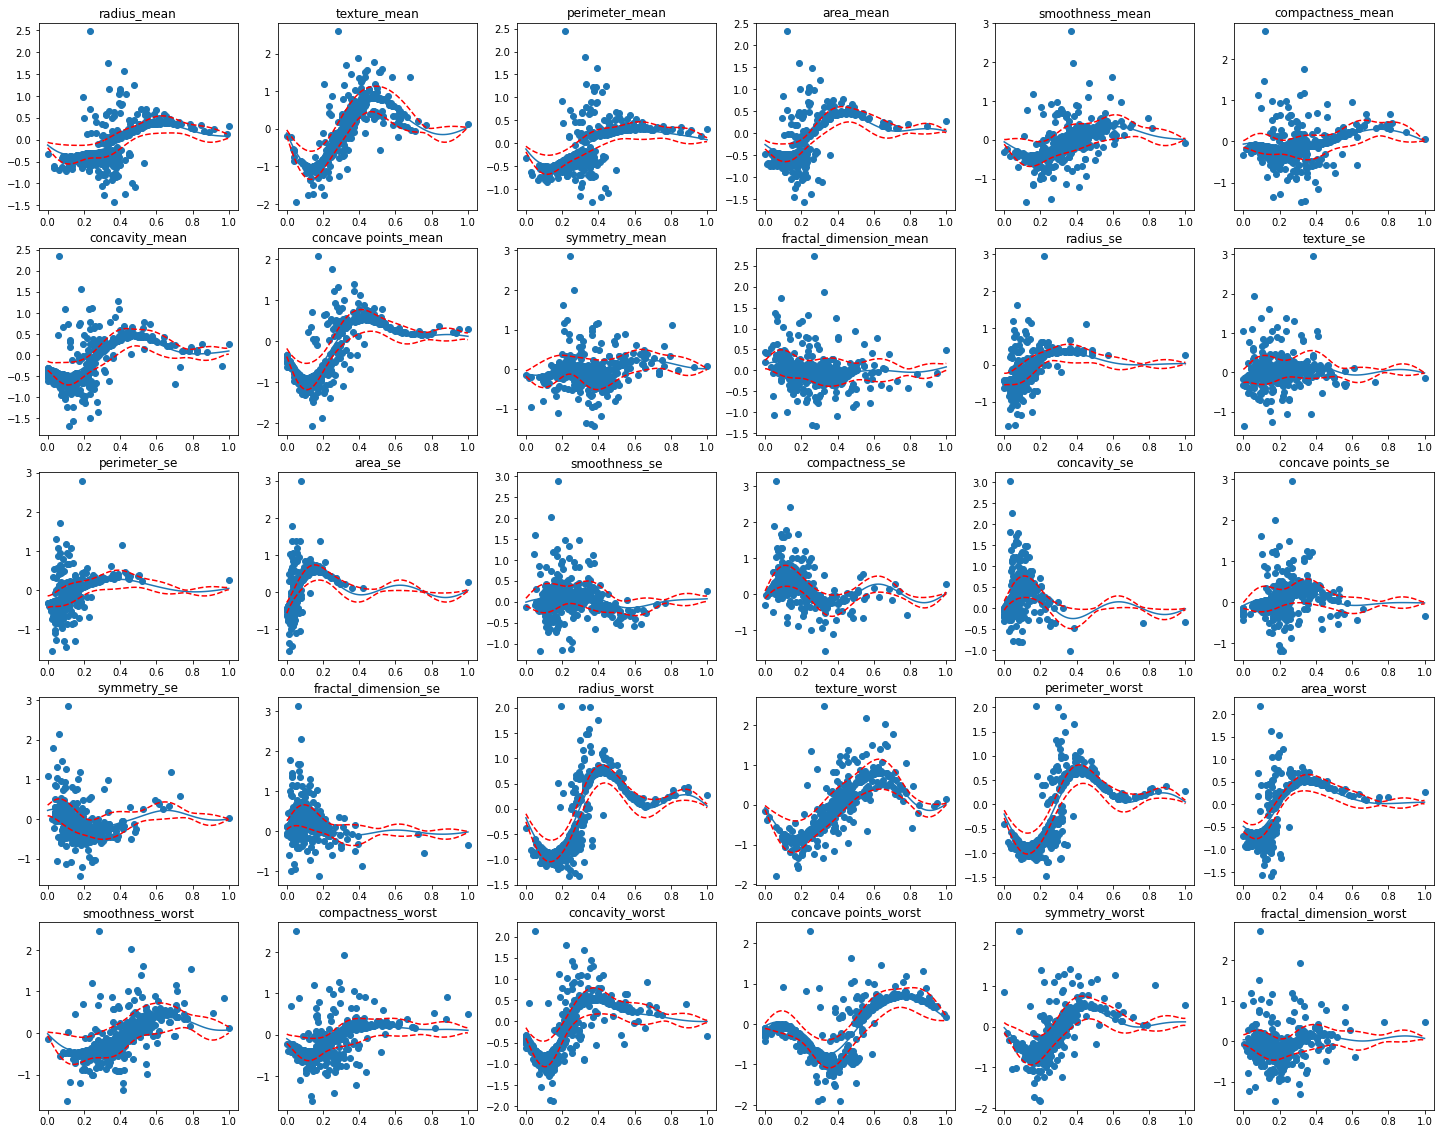

In [ ]:
res = model_gam.deviance_residuals(X_train,y_train)
plt.figure(figsize=(25,20))
for i, term in enumerate(model_gam.terms):
    if term.isintercept:
        continue

    XX = model_gam.generate_X_grid(term=i)
    pdep, confi = model_gam.partial_dependence(term=i, X=XX, width=0.95)
    pdep2, _ = model_gam.partial_dependence(term=i, X=X_train, width=0.95)
    plt.subplot(5,6,i+1)
    plt.scatter(X_train.iloc[:,term.feature], pdep2 + res)
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(X_train.columns.values[term.feature])
plt.savefig("GAM.png", dpi=200)

### Boosting
In this section, we would like to make use of Adaboost and XGBoost for prediction.

In [ ]:
def metrics_tab(clf, X_train, X_test, y_train, y_test):
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)

    train_predprob = clf.predict_proba(X_train)
    test_predprob = clf.predict_proba(X_test)

    train_acc= accuracy_score(y_train,train_pred)
    test_acc= accuracy_score(y_test,test_pred)

    fpr, tpr, threshold = roc_curve(y_test, test_predprob[:, 1])

    train_f1= f1_score(y_train,train_pred)
    test_f1= f1_score(y_test,test_pred)

    train_auc = roc_auc_score(y_train, train_predprob[:,1] )
    test_auc = roc_auc_score(y_test, test_predprob[:,1] )

    table = pd.DataFrame([[train_acc, train_f1,train_auc],[test_acc, test_f1, test_auc]],
                            index = ["Train","Test"], columns = ["Accuracy","F1 Score","AUC"])
    return table

In [ ]:
cv = StratifiedKFold(n_splits = 5, random_state = 263, shuffle= True)

In [ ]:
#GBC
parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
              'min_samples_split':[2,5,10,20], 
              'max_depth':[2,3,5,10]
              }
gbc_grid = GridSearchCV(GradientBoostingClassifier(), parameters, cv=cv, n_jobs=-1)
gbc_grid.fit(X_train,y_train)
metrics_tab(gbc_grid, X_train, X_test, y_train, y_test)

,Accuracy,F1 Score,AUC
Train,1.000000,1.00000,1.000000
Test,0.964912,0.95122,0.989087


In [ ]:
#ADA
parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2]}
ada_grid = GridSearchCV(AdaBoostClassifier(), parameters, cv=cv, n_jobs=-1)

ada_grid.fit(X_train,y_train)
metrics_tab(ada_grid, X_train, X_test, y_train, y_test)


,Accuracy,F1 Score,AUC
Train,0.986813,0.982249,0.999381
Test,0.973684,0.962963,0.992725


In [ ]:
#XGB
parameters = {
    "eta": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth": [3,5,7,10],
    'min_child_weight':range(1,6,2)
              }
xgb_grid = GridSearchCV(XGBClassifier(), parameters, cv=cv, n_jobs=-1)

xgb_grid.fit(X_train,y_train)
metrics_tab(xgb_grid, X_train, X_test, y_train, y_test)

,Accuracy,F1 Score,AUC
Train,1.000000,1.00,1.000000
Test,0.964912,0.95,0.986111


The AdaBoost method achieves the highest accuracy, F1 score and AUC, hence is chosen as the best boosting model. The top 5 important features derived from AdaBoost is as follows:

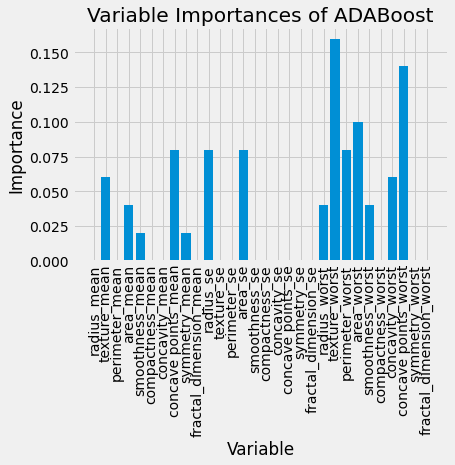

In [ ]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(ada_grid.best_estimator_.feature_importances_)))
# Make a bar chart
plt.bar(x_values, ada_grid.best_estimator_.feature_importances_, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, data.columns[1:], rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances of ADABoost') ;



### SVM

In [ ]:
parameters = {
  'C': [0.1,1, 10, 100], 
  'gamma': [1,0.1,0.01,0.001, 'scale'],
  'kernel': ['linear', 'poly', 'rbf'] }
svc_grid = GridSearchCV(svm.SVC(probability = True), parameters, cv=cv, n_jobs=-1)

svc_grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=263, shuffle=True),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 'scale'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [ ]:
svc_grid.best_estimator_

SVC(C=1, probability=True)

In [ ]:
metrics_tab(svc_grid, X_train, X_test, y_train, y_test)

,Accuracy,F1 Score,AUC
Train,0.984615,0.979104,0.996574
Test,0.973684,0.963855,0.997024


It turns out that the radial kernelized SVC gives the highest accuracy. 



# Decision Tree


In [ ]:
# Decision tree 
feature_list = list(X_train.columns)


# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

metrics_tab(clf, X_train, X_test, y_train, y_test)







,Accuracy,F1 Score,AUC
Train,1.000000,1.000000,1.000000
Test,0.921053,0.891566,0.912698


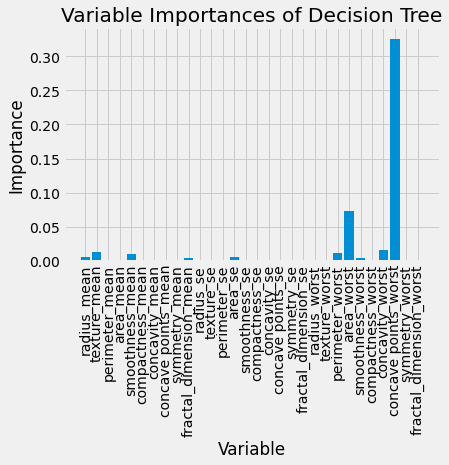

In [ ]:
clf_importance = clf.tree_.compute_feature_importances(normalize=False)

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(clf_importance )))
# Make a bar chart
plt.bar(x_values, clf_importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances of Decision Tree') ;



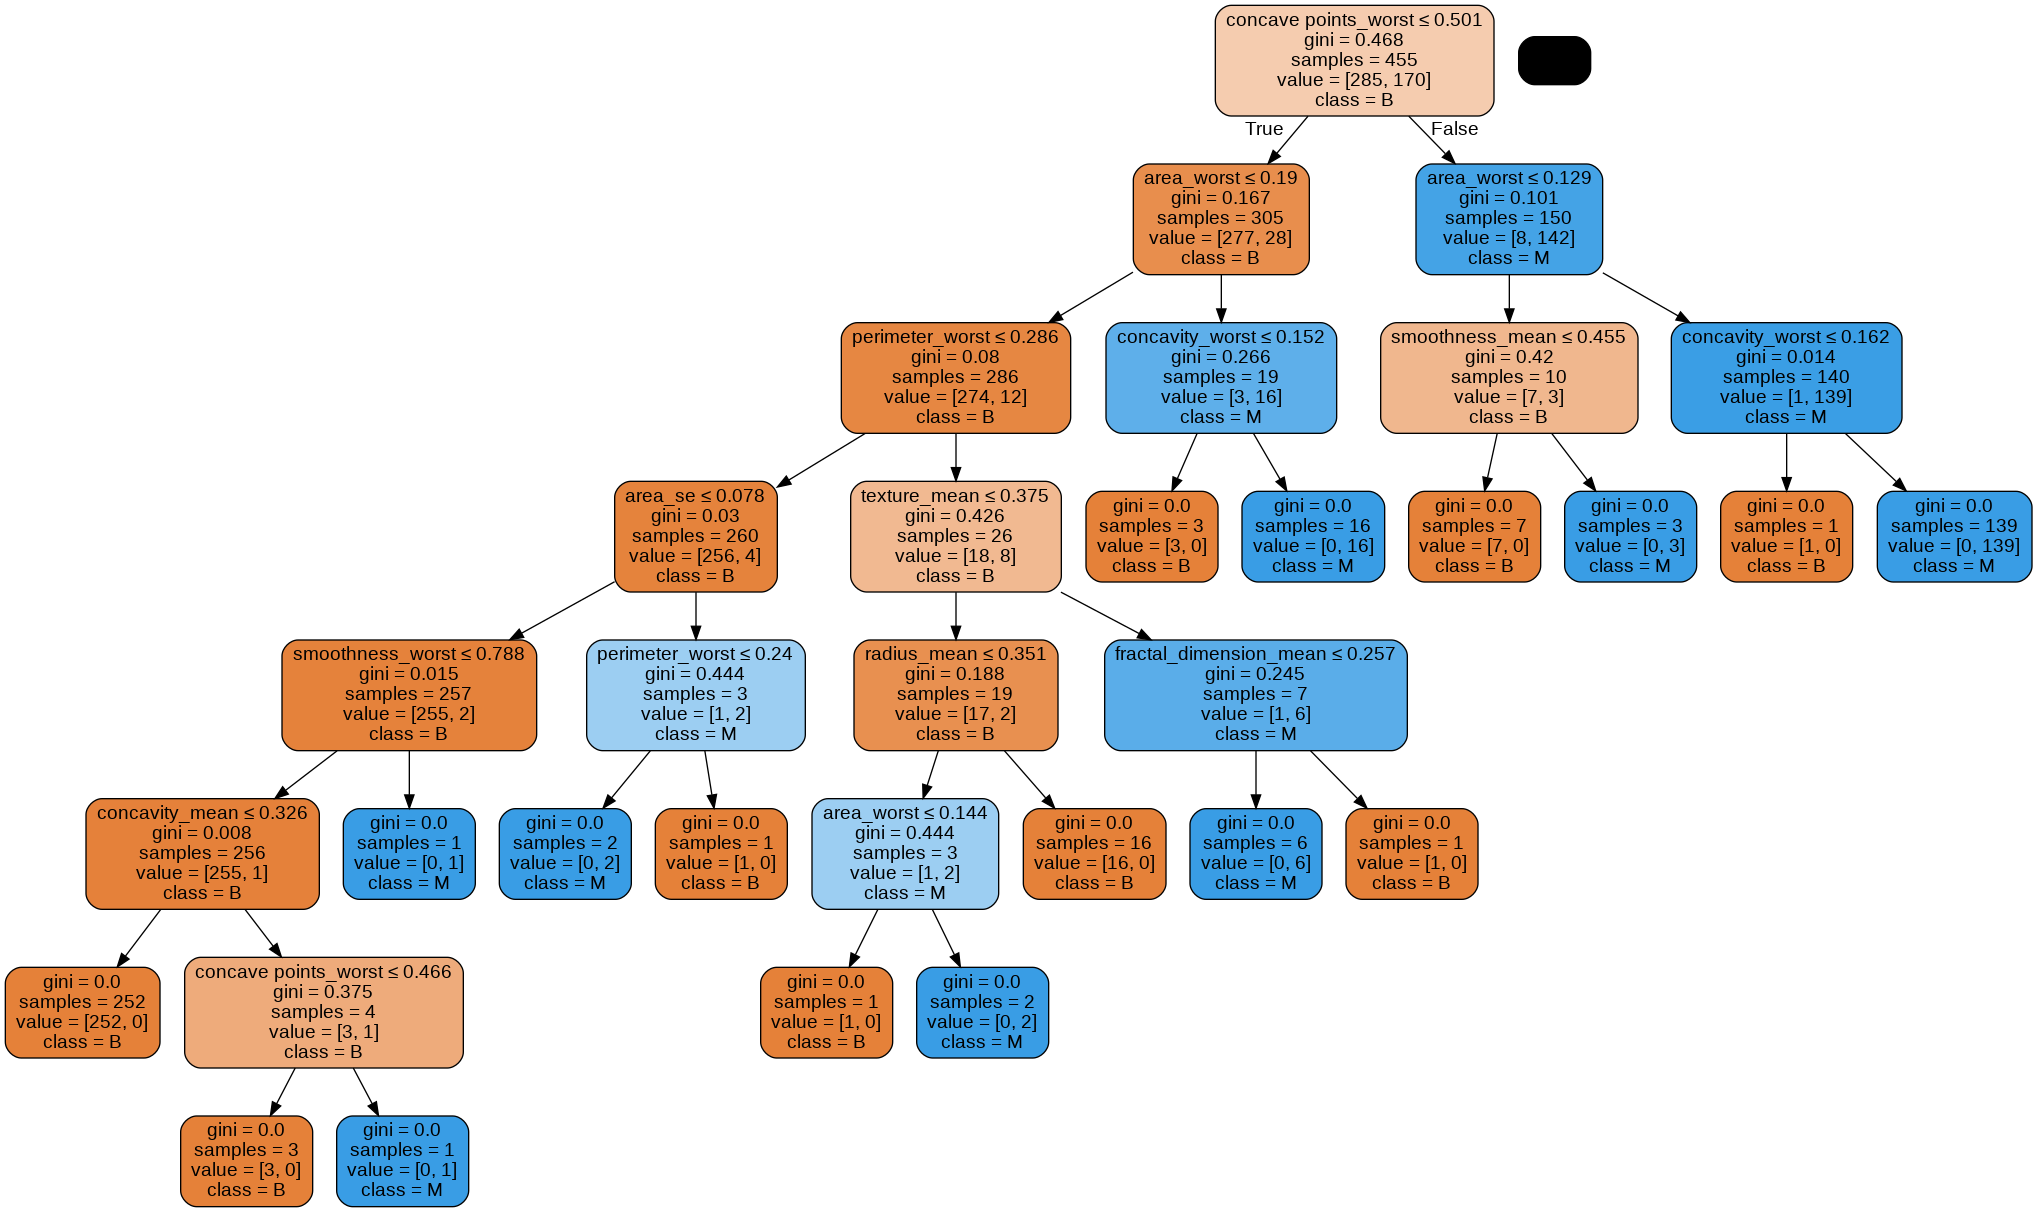

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_list,class_names=['B','M'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dct.png')
Image(graph.create_png())




# Random Forest




In [ ]:
from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:

import sklearn
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = sklearn.ensemble.RandomForestClassifier() 
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=263, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)





Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=263, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}

In [ ]:


# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [90, 100, 110],
    'max_features': [5, 6, 7],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [500, 1000, 1500]
}
# Create a based model
rf = sklearn.ensemble.RandomForestClassifier() 

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)


grid_search.fit(X_train, y_train)
grid_search.best_params_

rf_grid = grid_search.best_estimator_
#grid_accuracy = evaluate(rf_grid, X_test, y_test)

metrics_tab(rf_grid, X_train, X_test, y_train, y_test)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


,Accuracy,F1 Score,AUC
Train,1.000000,1.000000,1.000000
Test,0.973684,0.962963,0.974868


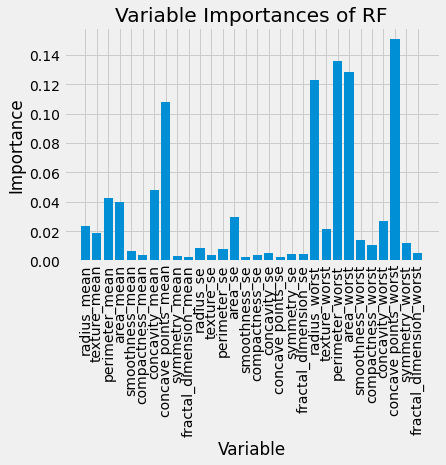

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

importances = list(rf_grid.feature_importances_)



# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances of RF') ;